In [3]:
import tensorflow as tf
tf.range(5)

<tf.Tensor 'range_1:0' shape=(5,) dtype=int32>

In [4]:
tf.linspace(0, 5, 11) # 시작값은 float 형태로 줄 것

TypeError: Value passed to parameter 'start' has DataType int32 not in list of allowed values: bfloat16, float32, float64

In [5]:
tf.linspace(0.0, 5, 11) # 0부터 5까지 11개의 구간으로 나눔

<tf.Tensor 'LinSpace_2:0' shape=(11,) dtype=float32>

In [6]:
tf.zeros((2, 3))

<tf.Tensor 'zeros:0' shape=(2, 3) dtype=float32>

In [7]:
tf.ones((2, 3))

<tf.Tensor 'ones:0' shape=(2, 3) dtype=float32>

In [8]:
tf.fill([3, 3], 5) # 3x3 행렬을 모두 5로 채움

<tf.Tensor 'Fill:0' shape=(3, 3) dtype=int32>

In [9]:
tf.zeros_like([[3, 4, 5], [0, 0, 1]]) # 2행 3열에 0이 모두 채워진채로 배열 생성

<tf.Tensor 'zeros_like:0' shape=(2, 3) dtype=int32>

In [11]:
tf.random.shuffle([1, 1, 3, 4])

<tf.Tensor 'RandomShuffle:0' shape=(4,) dtype=int32>

In [15]:
tf.set_random_seed(777) # 동일 난수 생성
tf.random.set_random_seed(777)

In [ ]:
tf.reshape(x, (3, 2)) # x가 1차원 벡터 → 3행 ㅈ열
tf.transpose(x) # 전치 행렬

In [20]:
r0 = tf.reshape(tf.range(12), (3, 4))
r0

<tf.Tensor 'Reshape_2:0' shape=(3, 4) dtype=int32>

In [21]:
sess = tf.Session()
sess.run(r0)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [22]:
r1 = tf.slice(r0, [0, 1], [2, 3]) # 0, 1 위치에서 2행 3열만큼 자른다
sess.run(r1)

array([[1, 2, 3],
       [5, 6, 7]])

In [26]:
s1, s2 = tf.split(r0, num_or_size_splits=2, axis=1)
print(sess.run(r0))
print(sess.run(s1))
sess.run(s2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[0 1]
 [4 5]
 [8 9]]


array([[ 2,  3],
       [ 6,  7],
       [10, 11]])

In [32]:
a = tf.range(6, dtype=tf.int32)
sess.run(a)

array([0, 1, 2, 3, 4, 5])

In [33]:
b = 2*tf.ones(6, dtype=tf.int32)
sess.run(b)

array([2, 2, 2, 2, 2, 2])

In [34]:
sess.run(tf.add(a, b))

array([2, 3, 4, 5, 6, 7])

In [35]:
sess.run(tf.subtract(a, b))

array([-2, -1,  0,  1,  2,  3])

In [36]:
sess.run(tf.multiply(a, b))

array([ 0,  2,  4,  6,  8, 10])

In [37]:
sess.run(tf.divide(a, b))

array([0. , 0.5, 1. , 1.5, 2. , 2.5])

tf.abs(): 절대값 <br>
tf.square(): 제곱 <br>
tf.cumsum(): 누적합 <br>
tf.sqrt(): 제곱근 <br>
tf.maxinum(): 최대 <br>
tf.minimum(): 최소 <br> <br>

* reduce = 차원을 줄인다 <br>
tf.reduce_mean(): axis 설정, 설정된 축을 기준으로 평균을 구한다 <br>
tf.reduce_sum() <br>
tf.reduce_min() <br>
tf.reduce_max() <br>

In [39]:
x = tf.constant([[2, 0], [0, 1]], dtype=tf.float32)
y = tf.constant([[1, 1], [1, 1]], dtype=tf.float32)
z = tf.matmul(x, y)
sess.run(z)

array([[2., 2.],
       [1., 1.]], dtype=float32)

In [41]:
xinv = tf.linalg.inv(x) # 역행렬
sess.run(xinv)

array([[0.5, 0. ],
       [0. , 1. ]], dtype=float32)

tf.nn.sigmoid() : 대표적인 로지스틱 함수

## 단순 회귀 모델 hf = wx + b
hf = 예측값, 오류 = hf - ytrain

In [59]:
# 그래프 정의
xtrain = [1, 2, 3] # 입력 값
ytrain = [1, 2, 3] # 실제 결과 값
# 변수 생성
b = tf.Variable(tf.random_normal([1])) # normal-정규분포를 따르는 난수, uniform - 균등분포를 따르는 난수
w = tf.Variable(tf.random_normal([1]))

hf = xtrain*w+b
cost = tf.reduce_mean(tf.square(hf - ytrain)) # 제곱의 합의 평균

# opt = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# train = opt.minimize(cost)
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# 그래프 실행
# 세션 생성
sess = tf.Session()
# 변수 초기화
sess.run(tf.global_variables_initializer())
# 트레이닝
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(w), sess.run(b))

0 1.4947616 [0.5790615] [-0.33142415]
20 0.015489479 [1.0061576] [-0.13667043]
40 0.0018995497 [1.0446523] [-0.11318623]
60 0.0016148664 [1.0462469] [-0.10624231]
80 0.0014656521 [1.0444251] [-0.1010946]
100 0.0013311212 [1.0423708] [-0.09632881]
120 0.0012089462 [1.0403826] [-0.09180031]
140 0.0010979838 [1.038485] [-0.08748588]
160 0.0009972078 [1.0366765] [-0.08337433]
180 0.00090567657 [1.0349528] [-0.07945601]
200 0.0008225474 [1.0333102] [-0.07572186]
220 0.00074705086 [1.0317447] [-0.07216324]
240 0.00067848363 [1.0302528] [-0.06877183]
260 0.00061620935 [1.028831] [-0.06553975]
280 0.000559649 [1.0274762] [-0.06245962]
300 0.0005082847 [1.0261849] [-0.0595243]
320 0.0004616345 [1.0249543] [-0.05672692]
340 0.00041926492 [1.0237815] [-0.054061]
360 0.0003807815 [1.022664] [-0.05152034]
380 0.00034583 [1.0215987] [-0.04909911]
400 0.0003140949 [1.0205841] [-0.04679178]
420 0.00028526734 [1.0196165] [-0.04459295]
440 0.0002590824 [1.0186944] [-0.04249713]
460 0.00023530125 [1.0178

### placeholder를 이용한 학습

In [62]:
w = tf.Variable(tf.random_normal([1]), name="weight") # 이름을 주면 텐서보드 사용 시, 변수 식별이 편해짐
b = tf.Variable(tf.random_normal([1]), name="bias")

In [101]:
x = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])
hf = x*w+b
cost = tf.reduce_mean(tf.square(hf-y))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cv, wv, bv, _ = sess.run([cost, w, b, train], feed_dict={x: [1, 2, 3], y: [1, 2, 3]})
    if step%20 == 0:
        print(step, cv, wv, bv)

0 69.956665 4.6386666 [-0.454]
20 1.018396 1.9960705 [-1.5199213]
40 0.35809603 1.7139157 [-1.5520184]
60 0.32008934 1.657955 [-1.4889373]
80 0.2906637 1.6248997 [-1.4199014]
100 0.26398507 1.5953287 [-1.3532609]
120 0.23975551 1.5673312 [-1.2896711]
140 0.21774988 1.5406669 [-1.2290626]
160 0.19776392 1.5152574 [-1.1713012]
180 0.17961246 1.4910424 [-1.1162546]
200 0.16312689 1.4679652 [-1.0637945]
220 0.14815442 1.4459724 [-1.0138001]
240 0.13455613 1.4250134 [-0.9661552]
260 0.122206055 1.4050392 [-0.9207494]
280 0.11098948 1.3860039 [-0.8774775]
300 0.10080246 1.3678632 [-0.83623934]
320 0.09155044 1.350575 [-0.7969393]
340 0.08314756 1.3340992 [-0.759486]
360 0.07551593 1.3183978 [-0.7237929]
380 0.06858481 1.3034343 [-0.6897774]
400 0.062289793 1.289174 [-0.6573603]
420 0.056572586 1.2755837 [-0.6264669]
440 0.051380154 1.2626325 [-0.5970253]
460 0.046664286 1.2502897 [-0.5689673]
480 0.042381242 1.2385269 [-0.542228]
500 0.038491342 1.2273172 [-0.5167453]
520 0.034958467 1.21663

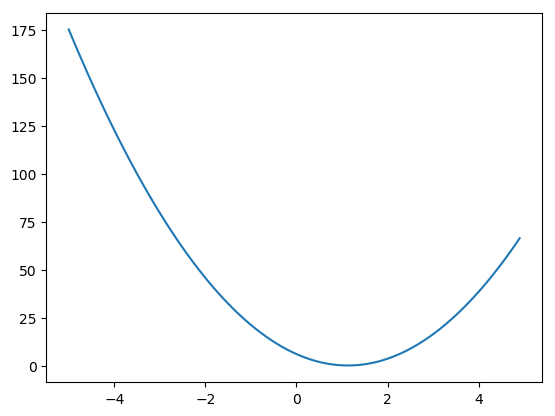

In [110]:
import matplotlib.pyplot as plt
xtrain = [1,2,3] # 입력값
ytrain = [1,2,3] # hf(예측값)과 비교할 실제 결과값
w = tf.placeholder(tf.float32)
hf = xtrain*w+b 
cost = tf.reduce_mean(tf.square(hf-ytrain)) 

sess = tf.Session()
sess.run(tf.global_variables_initializer())  

wvList = []
cvList = []

for step in range(-50,50):
    fw = step*0.1
    cv,wv = sess.run([cost,w], feed_dict={w:fw})
    wvList.append(wv)
    cvList.append(cv)
plt.style.use("default")
plt.plot(wvList, cvList)
plt.show()

In [92]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
b = tf.Variable([-.3], tf.float32)
w = tf.Variable([100.], tf.float32)

hf = x*w+b
loss = tf.reduce_sum(tf.square(hf-y))
# train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
# train = tf.train.GradientDescentOptimizer(1).minimize(loss)
train = tf.train.GradientDescentOptimizer(1e-10).minimize(loss)
xtrain = [1, 2, 3, 4]
ytrain = [0, -1, -2, -3]

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    sess.run(train, {x: xtrain, y:ytrain})
    if step%20 == 0:
        wv, bv, lv = sess.run([w, b, loss], feed_dict={x:xtrain, y: ytrain})
        print("step: %d, w: %s, b:%s, loss:%s" % (step, wv, bv, lv))
wv, bv, lv = sess.run([w, b, loss], feed_dict={x:xtrain, y: ytrain})
print("w: %s, b:%s, loss:%s" % (wv, bv, lv))

step: 0, w: [100.], b:[-0.30000022], loss:303410.75
step: 20, w: [100.], b:[-0.3000044], loss:303410.75
step: 40, w: [100.], b:[-0.30000857], loss:303410.75
step: 60, w: [100.], b:[-0.30001274], loss:303410.75
step: 80, w: [100.], b:[-0.3000169], loss:303410.75
step: 100, w: [100.], b:[-0.30002108], loss:303410.75
step: 120, w: [100.], b:[-0.30002525], loss:303410.75
step: 140, w: [100.], b:[-0.30002943], loss:303410.72
step: 160, w: [100.], b:[-0.3000336], loss:303410.7
step: 180, w: [100.], b:[-0.30003777], loss:303410.7
step: 200, w: [100.], b:[-0.30004194], loss:303410.66
step: 220, w: [100.], b:[-0.30004612], loss:303410.66
step: 240, w: [100.], b:[-0.3000503], loss:303410.66
step: 260, w: [100.], b:[-0.30005446], loss:303410.66
step: 280, w: [100.], b:[-0.30005863], loss:303410.66
step: 300, w: [100.], b:[-0.3000628], loss:303410.66
step: 320, w: [100.], b:[-0.30006698], loss:303410.62
step: 340, w: [100.], b:[-0.30007115], loss:303410.6
step: 360, w: [100.], b:[-0.30007532], los

In [100]:
xtrain = [1, 2, 3]
ytrain = [2, 4, 7]
w = tf.Variable(5.0)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

hf = x*w
cost = tf.reduce_mean(tf.square(hf-y))

lr = 0.01
gradient = tf.reduce_mean((w*x-y)*x) # gradient 라는 node
descent = w-lr*gradient
update = w.assign(descent) # update 라는 node
# = train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
# for step in range(100):
#     print(step, sess.run(w))
#     sess.run(train)

for step in range(20):
    sess.run(update, feed_dict={x: xtrain, y: ytrain})
    print(step, sess.run(cost, feed_dict={x: xtrain, y: ytrain}))


0 33.032196
1 30.031977
2 27.305252
3 24.827078
4 22.5748
5 20.52783
6 18.667458
7 16.976671
8 15.440003
9 14.043416
10 12.774129
11 11.620548
12 10.572125
13 9.619267
14 8.753268
15 7.966211
16 7.250899
17 6.600792
18 6.0099435
19 5.472954


In [107]:
import numpy as np
num_points = 200
vectors_set = []
for i in range(num_points):
    x = np.random.normal(5, 5) + 15
    y = x*1000+np.random.normal(0, 3)*1000 # 랜덤한 함수
    vectors_set.append([x, y])

xdata = [v[0] for v in vectors_set]
ydata = [v[1] for v in vectors_set]

W0729 14:45:33.149897 22648 legend.py:1289] No handles with labels found to put in legend.


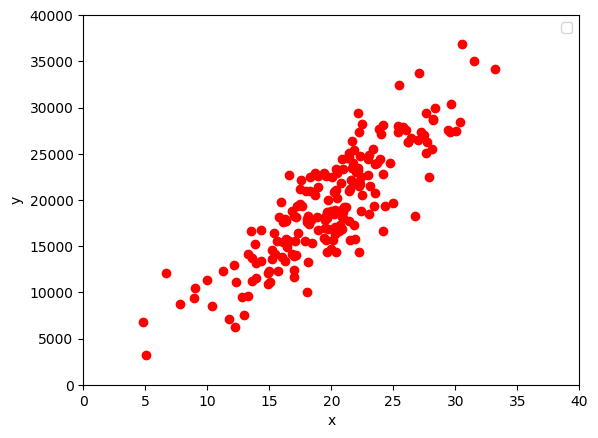

In [114]:
plt.plot(xdata, ydata, "ro")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0, 40])
plt.ylim([0, 40000])
plt.legend()

0 [828.684] [39.037815]
0 18977474.0
1 [955.79004] [44.924816]
1 9641257.0
2 [975.2784] [45.730194]
2 9421870.0
3 [978.2703] [45.756634]
3 9416702.0
4 [978.7336] [45.663685]
4 9416568.0
5 [978.80914] [45.55244]
5 9416552.0
6 [978.8253] [45.438408]
6 9416539.0
7 [978.8324] [45.32396]
7 9416526.0
8 [978.838] [45.209454]
8 9416513.0
9 [978.8435] [45.094955]
9 9416500.0


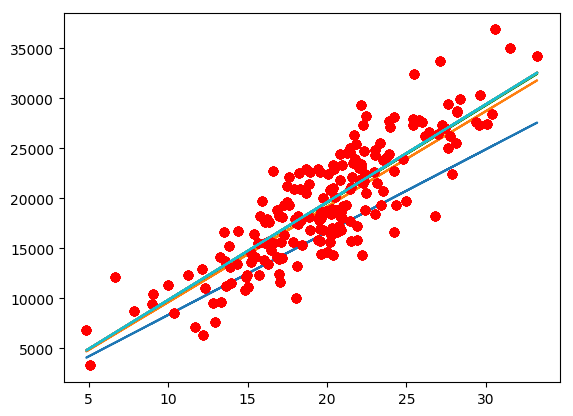

In [124]:
w = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = w*xdata+b
loss = tf.reduce_mean(tf.square(y-ydata))
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
# train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
sess.run(tf.initialize_all_variables()) # 변수 초기화

for step in range(10):
    sess.run(train)
    print(step, sess.run(w), sess.run(b))
    print(step, sess.run(loss))
    plt.plot(xdata, ydata, "ro")
    plt.plot(xdata, sess.run(w)*xdata+sess.run(b))
    # plt.show() # 새롭게 만들어짐

## keras 패키지
tensorflow를 엔진으로 사용하는 python 패키지 <br>
신경망을 쉽게 구현 <br>
엽슨용 데이터셋 제공 (CIFAR10(class가 10개), CIFAR100)

In [151]:
from tensorflow import keras
mnist = keras.datasets.mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data() # data download

<function matplotlib.pyplot.show(*args, **kw)>

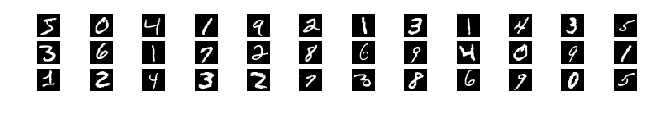

In [152]:
plt.figure(figsize=(8, 1))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(xtrain[i], cmap="gray")
    plt.axis("off")
plt.show
# [5 0 4 1 9 2 1 3 1 4 ]

In [131]:
xtrain.shape

(60000, 28, 28)

In [132]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [153]:
xtrain = xtrain.reshape(60000, 28*28).astype("float32")/255.0

In [154]:
xtest = xtest.reshape(10000, 28*28).astype("float32")/255.0

In [155]:
print(xtrain.shape, xtrain.dtype)

(60000, 784) float32


In [156]:
print(xtest.shape, xtest.dtype)

(10000, 784) float32


In [157]:
print(ytrain[:10])

[5 0 4 1 9 2 1 3 1 4]


In [158]:
from tensorflow.keras.utils import to_categorical
ytrain = to_categorical(ytrain, 10)
ytest = to_categorical(ytest, 10)
ytrain[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### keras로 신경망 구성하는 순서
1. Sequential class → 객체 생성

2. add method → 층layer 추가
    * 입력부터 순서대로 추가
    * shape 체크
    * activation 활성 함수 활성화 설정
    
3. compile (모델 생성)
    * loss, optimizer(알고리즘), 성능기준 설정
    
4. fit method → training
    * 에폭 설정 (6만개 data가 있다면 1에폭 = 6만개 training) 
    * 배치 크기 설정 (분할 모델링, 큐 러너 등 사용)
    

In [160]:
# from tensorflow.keras import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
np.random.seed(0)

In [166]:
model = Sequential()
# Dense 객체로 층 추가
# input_dim은 맨 처음 입력받는 계층에서만 존재하고
# 그 이후에는 이전 층의 출력 개수가 입력 차원으로 들어간다
model.add(Dense(15, input_dim=28*28, activation="sigmoid")) # 출력 개수, 입력 차원, 활성 함수 
model.add(Dense(10, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.1), 
              loss="mean_squared_error", 
              metrics=["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 15)                11775     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________
